In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from reliabilipy import reliability_analysis
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer import ConfirmatoryFactorAnalyzer
from factor_analyzer import ModelSpecificationParser
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

import warnings
warnings.filterwarnings("ignore")

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

# ANÁLISIS EASI

In [9]:
easi_exp = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/EASI-exp.xlsx')
easi_con = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/EASI-con.xlsx')
X_exp = StandardScaler().fit_transform(easi_exp)
X_con = StandardScaler().fit_transform(easi_con)

## ANÁLISIS FACTORIAL EXPLORATORIO
### Método de extracción: Factorización de ejes principales
### Rotación: Oblimin

<Axes: xlabel='Factores', ylabel='EigenValues'>

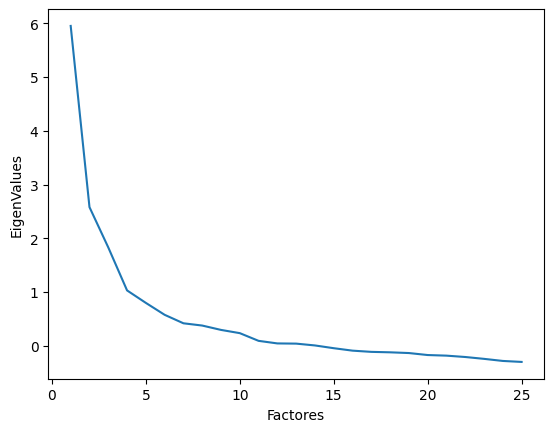

In [10]:
fa = FactorAnalyzer(n_factors = 10,
                    rotation = 'oblimin')
fa.fit(X_exp)

FactorAnalyzer(bounds = (0.005, 1),
               impute = 'median',
               is_corr_matrix = False,
               method = 'principal',
               n_factors = 3,
               rotation = 'oblimin',
               rotation_kwargs = {},
               use_smc = True)

factores = range(1, X_exp.shape[1] + 1)
evs = fa.get_eigenvalues()[1]
df = pd.DataFrame({'Factores':factores,
                   'EigenValues':evs})

sns.lineplot(data = df,
             x = 'Factores',
             y = 'EigenValues')

In [11]:
fa = FactorAnalyzer(n_factors = 5,
                    rotation = 'oblimin',
                    method = 'principal',
                    use_smc = True)
fa.fit(X_exp)

cols_exp = ['F1', 'F2', 'F3', 'F4', 'F5']
all_up = [False, False, False, False, False]

loadings = pd.DataFrame(fa.loadings_,
                        columns = cols_exp,
                        index = easi_exp.columns)\
                            .apply(lambda x: [y if y >= 0.3 else 0 for y in x])\
                            .sort_values(by = cols_exp,
                                        ascending = all_up)\
                            .apply(lambda x: [y if y > 0 else '' for y in x])

loadings

,F1,F2,F3,F4,F5
easi3,0.705954,,,,
easi17,0.689171,,,,
easi2,0.662825,,,,
easi12,0.530648,,,,
easi15,0.376909,,,0.363085,0.30304
easi22,0.351539,,,,0.365853
easi24,,0.871622,,,
easi9,,0.834718,,,
easi14,,0.832859,,,
easi4,,0.688893,,,


### Correlación entre factores

In [12]:
correlaciones = pd.DataFrame(fa.phi_,
                              columns = cols_exp,
                              index = cols_exp)
correlaciones

,F1,F2,F3,F4,F5
F1,1.000000,0.189351,0.166986,0.174666,0.299622
F2,0.189351,1.000000,0.163906,-0.059754,0.250937
F3,0.166986,0.163906,1.000000,0.194360,0.131274
F4,0.174666,-0.059754,0.194360,1.000000,0.192815
F5,0.299622,0.250937,0.131274,0.192815,1.000000


### Varianza explicada

In [13]:
var_array = fa.get_factor_variance()
varianzas = pd.DataFrame(var_array,
                         columns = cols_exp,
                         index = ['Varianza',
                                  'Varianza Proporcional',
                                  'Varianza Acumulada'])
varianzas

,F1,F2,F3,F4,F5
Varianza,2.447608,3.178899,3.037730,2.030521,2.450911
Varianza Proporcional,0.097904,0.127156,0.121509,0.081221,0.098036
Varianza Acumulada,0.097904,0.225060,0.346569,0.427790,0.525827


## ANÁLISIS FACTORIAL CONFIRMATORIO
### BARTLETT

In [14]:
chi_square_value,p_value = calculate_bartlett_sphericity(X_con)
print('Ji cuadrada =', f'{chi_square_value:.3}')
print('p =', f'{p_value:.3}')

Ji cuadrada = 1.83e+03
p = 1.48e-217


### KMO

In [15]:
kmo_all,kmo_model=calculate_kmo(X_con)
print('KMO =', f'{kmo_model:.3}')

KMO = 0.855


In [16]:
factores = ['CS', 'RE', 'REM', 'SE', 'PF']
model_dict = {'CS':['easi1', 'easi6', 'easi11', 'easi16', 'easi21'],
              'RE':['easi2', 'easi7', 'easi12', 'easi17', 'easi22'],
              'REM':['easi3', 'easi8', 'easi13', 'easi18', 'easi23'],
              'SE':['easi4', 'easi9', 'easi14', 'easi19', 'easi24'],
              'PF':['easi5', 'easi10', 'easi15', 'easi20', 'easi25']}
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(easi_con,
                                                                          model_dict)

cfa = ConfirmatoryFactorAnalyzer(model_spec,
                                 disp = False)
cfa.fit(easi_con.values)

loadings = pd.DataFrame(cfa.loadings_,
                        columns = factores,
                        index = sum(model_dict.values(), []))
loadings = loadings.replace(0, '', regex = True)
loadings

,CS,RE,REM,SE,PF
easi1,0.415377,,,,
easi6,0.49712,,,,
easi11,0.676151,,,,
easi16,0.546905,,,,
easi21,0.77454,,,,
easi2,,0.599767,,,
easi7,,0.685118,,,
easi12,,0.009571,,,
easi17,,0.612999,,,
easi22,,0.799804,,,


### CORRELACIONES ENTRE FACTORES

In [17]:
corr = cfa.factor_varcovs_
corr = pd.DataFrame(data = corr,
                    columns = factores,
                    index = factores)
corr

,CS,RE,REM,SE,PF
CS,1.000000,0.697010,0.487692,0.531608,0.644999
RE,0.697010,1.000000,0.651017,0.476661,0.500637
REM,0.487692,0.651017,1.000000,0.622208,0.517289
SE,0.531608,0.476661,0.622208,1.000000,0.450603
PF,0.644999,0.500637,0.517289,0.450603,1.000000


<Axes: >

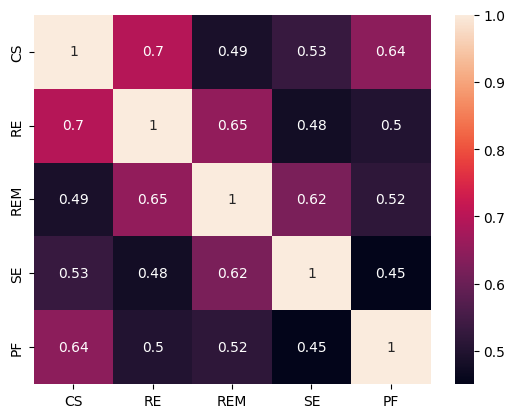

In [54]:
sns.heatmap(data = corr,
            annot = True)

### CONFIABILIDAD

In [18]:
ra = reliability_analysis(raw_dataset = easi_con,
                          is_corr_matrix = False,
                          impute = 'median')
ra.fit()

print('Omega total =', f'{ra.omega_total:.3}')
print('Alfa de Cronbach total =', f'{ra.alpha_cronbach:.3}')

Omega total = 0.895
Alfa de Cronbach total = 0.874


### Alfas de Cronbach

In [19]:
CS = easi_con[model_dict['CS']]
RE = easi_con[model_dict['RE']]
REM = easi_con[model_dict['REM']]
SE = easi_con[model_dict['SE']]
PF = easi_con[model_dict['PF']]


factores = [CS, RE, REM, SE, PF]

for factor in factores:
    ra = reliability_analysis(raw_dataset = factor,
                          is_corr_matrix = False,
                          impute = 'median')
    ra.fit() 
    print('Omega de', get_df_name(factor), '=', f'{ra.omega_total:.3}')
    print('Alfa de Cronbach de', get_df_name(factor), '=' , f'{ra.alpha_cronbach:.3}')

    for item in factor.columns:
        it_del = factor.drop(item, axis = 1)
        ra_id = reliability_analysis(raw_dataset = it_del,
                                     is_corr_matrix = False,
                                     impute = 'median')
        ra_id.fit()
        print('    Si se elimima el item', item, 'el alfa queda en', f'{ra_id.alpha_cronbach:.3}')
        if ra.alpha_cronbach >= ra_id.alpha_cronbach:
            print('          Se sugiere conservar el item')
        else:
            print('          Se sugiere eliminar el item')

Omega de CS = 0.832
Alfa de Cronbach de CS = 0.825
    Si se elimima el item easi1 el alfa queda en 0.804
          Se sugiere conservar el item
    Si se elimima el item easi6 el alfa queda en 0.784
          Se sugiere conservar el item
    Si se elimima el item easi11 el alfa queda en 0.786
          Se sugiere conservar el item
    Si se elimima el item easi16 el alfa queda en 0.795
          Se sugiere conservar el item
    Si se elimima el item easi21 el alfa queda en 0.785
          Se sugiere conservar el item
Omega de RE = 0.678
Alfa de Cronbach de RE = 0.66
    Si se elimima el item easi2 el alfa queda en 0.62
          Se sugiere conservar el item
    Si se elimima el item easi7 el alfa queda en 0.66
          Se sugiere eliminar el item
    Si se elimima el item easi12 el alfa queda en 0.581
          Se sugiere conservar el item
    Si se elimima el item easi17 el alfa queda en 0.599
          Se sugiere conservar el item
    Si se elimima el item easi22 el alfa queda en 0

# ANÁLISIS ESNOV

In [2]:
esnov_exp = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/ESNOV-exp.xlsx')
esnov_con = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/ESNOV-con.xlsx')
Z_exp = StandardScaler().fit_transform(esnov_exp)
Z_con = StandardScaler().fit_transform(esnov_con)

## ANÁLISIS FACTORIAL EXPLORATORIO
### Método de extracción: Factorización de ejes principales
### Rotación: Oblimin

<Axes: xlabel='Factores', ylabel='EigenValues'>

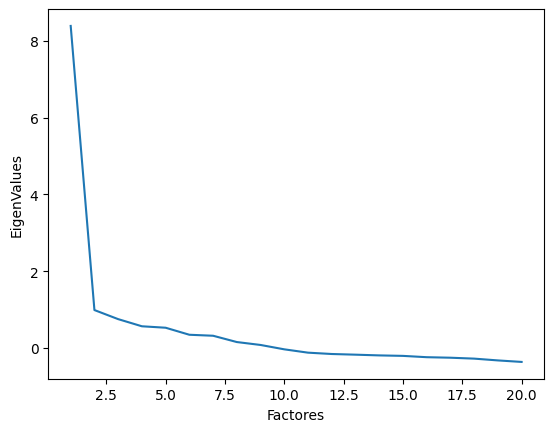

In [8]:
fa = FactorAnalyzer(n_factors = 10,
                    rotation = 'oblimin')
fa.fit(Z_exp)

FactorAnalyzer(bounds = (0.005, 1),
               impute = 'median',
               is_corr_matrix = False,
               method = 'principal',
               n_factors = 3,
               rotation = 'oblimin',
               rotation_kwargs = {},
               use_smc = True)

factores = range(1, Z_exp.shape[1] + 1)
evs = fa.get_eigenvalues()[1]
df = pd.DataFrame({'Factores':factores,
                   'EigenValues':evs})

sns.lineplot(data = df,
             x = 'Factores',
             y = 'EigenValues')

In [7]:
fa = FactorAnalyzer(n_factors = 2,
                    rotation = 'oblimin',
                    method = 'principal',
                    use_smc = True)
fa.fit(Z_exp)

cols_exp = ['F1', 'F2']
all_up = [False, False]

loadings = pd.DataFrame(fa.loadings_,
                        columns = cols_exp,
                        index = esnov_exp.columns)\
                            .apply(lambda x: [y if y >= 0.3 else 0 for y in x])\
                            .sort_values(by = cols_exp,
                                        ascending = all_up)\
                            .apply(lambda x: [y if y > 0 else '' for y in x])

loadings

,F1,F2
esnov15,0.842092,
esnov17,0.798275,
esnov10,0.718221,
esnov19,0.708634,
esnov9,0.690796,
esnov14,0.672083,
esnov18,0.645048,
esnov7,0.580426,
esnov16,0.573103,
esnov12,0.489611,


### Correlación entre factores

In [5]:
correlaciones = pd.DataFrame(fa.phi_,
                              columns = cols_exp,
                              index = cols_exp)
correlaciones

,F1,F2
F1,1.000000,0.611646
F2,0.611646,1.000000


### Varianza

In [6]:
var_array = fa.get_factor_variance()
varianzas = pd.DataFrame(var_array,
                         columns = cols_exp,
                         index = ['Varianza',
                                  'Varianza Proporcional',
                                  'Varianza Acumulada'])
varianzas

,F1,F2
Varianza,6.656430,1.692864
Varianza Proporcional,0.332822,0.084643
Varianza Acumulada,0.332822,0.417465


## ANÁLISIS FACTORIAL CONFIRMATORIO

### BARTLETT

In [9]:
chi_square_value,p_value = calculate_bartlett_sphericity(Z_con)
print('Ji cuadrada =', f'{chi_square_value:.3}')
print('p =', f'{p_value:.3}')

Ji cuadrada = 1.88e+03
p = 5.26e-275


### KMO

In [10]:
kmo_all,kmo_model=calculate_kmo(Z_con)
print('KMO =', f'{kmo_model:.3}')

KMO = 0.943


In [11]:
factores = ['SENV', 'SSNV']
model_dict = {'SENV':['esnov1', 'esnov3', 'esnov5', 'esnov7', 'esnov9',
                      'esnov11', 'esnov13', 'esnov15', 'esnov17', 'esnov19'],
              'SSNV':['esnov2', 'esnov4', 'esnov6', 'esnov8', 'esnov10',
                      'esnov12', 'esnov14', 'esnov16', 'esnov18', 'esnov20']}
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(esnov_con,
                                                                          model_dict)

cfa = ConfirmatoryFactorAnalyzer(model_spec,
                                 disp = False)
cfa.fit(esnov_con.values)

loadings = pd.DataFrame(cfa.loadings_,
                        columns = factores,
                        index = sum(model_dict.values(), []))
loadings = loadings.replace(0, '', regex = True)
loadings

,SENV,SSNV
esnov1,0.928402,
esnov3,0.901012,
esnov5,0.923511,
esnov7,0.8911,
esnov9,1.05123,
esnov11,0.946145,
esnov13,0.926037,
esnov15,0.907214,
esnov17,0.929069,
esnov19,0.985403,


In [12]:
corr = cfa.factor_varcovs_
corr = pd.DataFrame(data = corr, columns = factores, index = factores)
corr

,SENV,SSNV
SENV,1.000000,0.353002
SSNV,0.353002,1.000000


### CONFIABILIDAD

In [13]:
ra = reliability_analysis(raw_dataset = esnov_con,
                          is_corr_matrix = False,
                          impute = 'median')
ra.fit()

print('Omega total =', f'{ra.omega_total:.3}')
print('Alfa de Cronbach total =', f'{ra.alpha_cronbach:.3}')

Omega total = 0.924
Alfa de Cronbach total = 0.93


In [15]:
SENV = esnov_con[model_dict['SENV']]
SSNV = esnov_con[model_dict['SSNV']]


factores = [SENV, SSNV]

for factor in factores:
    ra = reliability_analysis(raw_dataset = factor,
                          is_corr_matrix = False,
                          impute = 'median')
    ra.fit() 
    print('Omega de', get_df_name(factor), '=', f'{ra.omega_total:.3}')
    print('Alfa de Cronbach de', get_df_name(factor), '=' , f'{ra.alpha_cronbach:.3}')

    for item in factor.columns:
        it_del = factor.drop(item, axis = 1)
        ra_id = reliability_analysis(raw_dataset = it_del,
                                     is_corr_matrix = False,
                                     impute = 'median')
        ra_id.fit()
        print('    Si se elimima el item', item, 'el alfa queda en', f'{ra_id.alpha_cronbach:.3}')
        if ra.alpha_cronbach >= ra_id.alpha_cronbach:
            print('          Se sugiere conservar el item')
        else:
            print('          Se sugiere eliminar el item')

Omega de SENV = 0.889
Alfa de Cronbach de SENV = 0.883
    Si se elimima el item esnov1 el alfa queda en 0.876
          Se sugiere conservar el item
    Si se elimima el item esnov3 el alfa queda en 0.872
          Se sugiere conservar el item
    Si se elimima el item esnov5 el alfa queda en 0.87
          Se sugiere conservar el item
    Si se elimima el item esnov7 el alfa queda en 0.872
          Se sugiere conservar el item
    Si se elimima el item esnov9 el alfa queda en 0.871
          Se sugiere conservar el item
    Si se elimima el item esnov11 el alfa queda en 0.878
          Se sugiere conservar el item
    Si se elimima el item esnov13 el alfa queda en 0.875
          Se sugiere conservar el item
    Si se elimima el item esnov15 el alfa queda en 0.87
          Se sugiere conservar el item
    Si se elimima el item esnov17 el alfa queda en 0.867
          Se sugiere conservar el item
    Si se elimima el item esnov19 el alfa queda en 0.867
          Se sugiere conservar 